In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib as plt
import streamlit as st
import folium
import os
import math


In [2]:
cities = pd.read_excel(r'C:\Users\Dilsan\Desktop\Coding for Data Science and Data Management\Python\Project\worldcities.xlsx')

In [3]:
# to calculate the distance between the cities
def haversine_distance_in_km(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    earth_radius = 6371  # You can use 3959 for miles

    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Differences in latitude and longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula: to calculate the shortest distance between two points on the surface of a sphere
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))   # arctangent of the quotient y/x in radians
    distance = earth_radius * c

    return distance



In [4]:
#removing the cities in the far south (latitude: the distance north or south of the equator)
#filter the df ['lat'>30], less rows but indexes not changed
#.reset_index():resets the index of df. The old index is added as a new column, and a new default integer index is assigned .
#.drop(['index'], axis=1):removes the old index column from df. The axis=1 parameter indicates that we are dropping a column
cities = cities[cities['lat']>30].reset_index().drop(['index'],axis=1)

In [5]:
london_lat = 51.5072
london_lng = -0.1275

In [6]:
#applying harvesine formula to each city to add a column 'distance_km' that represents the distance of each city to london
#Instead of using the def to define a function with a name, to create a small, unnamed function on the fly
#give the function london lat and lng as starting point and each lat and lng for each city to calculate the distance
#along rows (axis=1) or columns (axis=0). axis=1: lambda function is applied to each row of the DataFrame cities.
cities['distance_km'] = cities.apply(lambda row: haversine_distance_in_km(london_lat, london_lng, row['lat'], row['lng']), axis=1)
df = cities.sort_values('distance_km')
df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,distance_km
15,London,London,51.5072,-0.1275,United Kingdom,GB,GBR,"London, City of",primary,10979000.0,1826645935,0.000000
3729,Holborn,Holborn,51.5172,-0.1182,United Kingdom,GB,GBR,Camden,NaN,13023.0,1826657058,1.284766
4254,Lambeth,Lambeth,51.4903,-0.1193,United Kingdom,GB,GBR,Lambeth,NaN,9675.0,1826545364,1.963051
4185,Spitalfields,Spitalfields,51.5166,-0.0750,United Kingdom,GB,GBR,Tower Hamlets,NaN,10286.0,1826499077,3.780491
2663,Kensington,Kensington,51.5000,-0.1900,United Kingdom,GB,GBR,Kensington and Chelsea,NaN,64681.0,1826583042,4.399398
...,...,...,...,...,...,...,...,...,...,...,...,...
10852,Katsuura,Katsuura,35.1525,140.3211,Japan,JP,JPN,Chiba,NaN,17324.0,1392044206,9636.254742
11870,Kisanuki,Kisanuki,31.3447,130.9453,Japan,JP,JPN,Kagoshima,NaN,14495.0,1392204633,9638.538863
10877,Kushima,Kushima,31.4645,131.2284,Japan,JP,JPN,Miyazaki,NaN,17363.0,1392989065,9639.374565
11674,Nishinoomote,Nishinoomote,30.7325,130.9975,Japan,JP,JPN,Kagoshima,NaN,14980.0,1392981409,9700.971905


In [7]:
#used in calculate_cost function
def check_population(population):
    if population > 200000:
        return 2
    else:
        return 0

In [8]:
def pop(pop):
    if pop>200000:
        return 2
    else:
        return 0

In [9]:
#used in calculate_cost function
def check_country(current_city_country,destination_country):
    if current_city_country != destination_country:
        return 2
    else:
        return 0
    

In [10]:
#used in calculate_cost function
#calculating the cost resulting from the distance only
def get_travel_cost(index):
    res_dict = {0:2,1:4,2:8}
    return res_dict[index]

In [11]:
def sum_integers(row):
    # Filter out non-integer values and sum the remaining
    int_values = [value for value in row if isinstance(value, int)]
    return sum(int_values)

In [12]:
def calculate_cost(current_city_country,current_city_id,df):
    #current_city_country = df[df['city_id']==current_city_id]['country'].values[0]
    #df = df[df['city_id']!=current_city_id]
    #df = df.reset_index().drop('index',axis=1)
#DataFrame df called 'cost_country'.    
#applies a function to each row or column of the DataFrame
#lambda function takes each row of the DataFrame (row) and calls the check_country function with current_city_country 
#and the value in the 'country', 'population' columns of that row.
#axis=1: lambda function should be applied to rows. If axis=0 (or not specified), it would apply the function to columns.
    df['cost_country'] = df.apply(lambda row: check_country(current_city_country,row['country']), axis=1)
    #creates a new column named 'cost_country'
    df['cost_pop'] = df.apply(lambda row: check_population(row['population']), axis=1)
    df['travel_cost'] = df.apply(lambda row: get_travel_cost(row.name), axis=1)


    return df
    

In [13]:
def calculate_cost(current_city_country,current_city_id,df):
    #current_city_country = df[df['city_id']==current_city_id]['country'].values[0]
    #df = df[df['city_id']!=current_city_id]
    df = df.reset_index().drop('index',axis=1)
    
    df['cost_country'] = df.apply(lambda row: check_country(current_city_country,row['country']), axis=1)
    df['cost_pop'] = df.apply(lambda row: check_population(row['population']), axis=1)
    df['travel_cost'] = df.apply(lambda row: get_travel_cost(row.name), axis=1)


    return df

In [14]:
#in info_cities list
def sum_total_cost(row):
    return row['cost_country'] + row['cost_pop'] + row['travel_cost']



In [15]:
def choose_optimum_city(df):
    #Longitude is measured in degrees east or west from the Prime Meridian, and as we move east, the values increase
    #resets the index after sorting.
    #.loc[0]: selects the first row after sorting and resetting index, used to access a specific row by label (index) (which was reset in the previous step)
    df = df.sort_values(by=['lng'], ascending=[False]).reset_index().loc[0]
    city_id = df['city_id']
    total_cost = df['total_cost']
    city_name = df['city_name']
    lat = df['lat']
    lng = df['lng']
    country= df['country']
    return {'city_id':city_id,'total_cost':total_cost,'city_name':city_name,'lat':lat,'lng':lng,'country':country}


In [16]:

df = df.rename(columns={'id':'city_id','city':'city_name'})
df = df.reset_index().drop('index',axis=1)
df

,city_name,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,city_id,distance_km
0,London,London,51.5072,-0.1275,United Kingdom,GB,GBR,"London, City of",primary,10979000.0,1826645935,0.000000
1,Holborn,Holborn,51.5172,-0.1182,United Kingdom,GB,GBR,Camden,NaN,13023.0,1826657058,1.284766
2,Lambeth,Lambeth,51.4903,-0.1193,United Kingdom,GB,GBR,Lambeth,NaN,9675.0,1826545364,1.963051
3,Spitalfields,Spitalfields,51.5166,-0.0750,United Kingdom,GB,GBR,Tower Hamlets,NaN,10286.0,1826499077,3.780491
4,Kensington,Kensington,51.5000,-0.1900,United Kingdom,GB,GBR,Kensington and Chelsea,NaN,64681.0,1826583042,4.399398
...,...,...,...,...,...,...,...,...,...,...,...,...
19382,Katsuura,Katsuura,35.1525,140.3211,Japan,JP,JPN,Chiba,NaN,17324.0,1392044206,9636.254742
19383,Kisanuki,Kisanuki,31.3447,130.9453,Japan,JP,JPN,Kagoshima,NaN,14495.0,1392204633,9638.538863
19384,Kushima,Kushima,31.4645,131.2284,Japan,JP,JPN,Miyazaki,NaN,17363.0,1392989065,9639.374565
19385,Nishinoomote,Nishinoomote,30.7325,130.9975,Japan,JP,JPN,Kagoshima,NaN,14980.0,1392981409,9700.971905


In [17]:

np.random.seed(50)  # For reproducibility of the results, we can change the seed or remove it
#sampling without replacement requires the population size (df.index[1:]) that is greater than or equal to the sample size (499)
indices_to_sample = np.concatenate(([0], np.random.choice(df.index[1:], size=499, replace=False)))
sampled_df = df.iloc[indices_to_sample].sort_values(by='distance_km').reset_index(drop=True)
sampled_df

,city_name,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,city_id,distance_km
0,London,London,51.5072,-0.1275,United Kingdom,GB,GBR,"London, City of",primary,10979000.0,1826645935,0.000000
1,East Finchley,East Finchley,51.5902,-0.1753,United Kingdom,GB,GBR,Barnet,NaN,15989.0,1826180591,9.803167
2,Kenton,Kenton,51.5878,-0.3086,United Kingdom,GB,GBR,Brent,NaN,35600.0,1826411445,15.399424
3,Sidcup,Sidcup,51.4263,0.1024,United Kingdom,GB,GBR,Bexley,NaN,43109.0,1826363364,18.290429
4,Borehamwood,Borehamwood,51.6578,-0.2723,United Kingdom,GB,GBR,Hertfordshire,NaN,31955.0,1826433403,19.507078
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Tsukuba-kenkyūgakuen-toshi,Tsukuba-kenkyugakuen-toshi,36.0333,140.0667,Japan,JP,JPN,Ibaraki,NaN,240987.0,1392112466,9537.255861
496,Hokota,Hokota,36.1586,140.5164,Japan,JP,JPN,Ibaraki,NaN,46415.0,1392374973,9540.539550
497,Kashima,Kashima,35.9658,140.6450,Japan,JP,JPN,Ibaraki,NaN,67448.0,1392346235,9564.800984
498,Matsuda-sōryō,Matsuda-soryo,35.3483,139.1394,Japan,JP,JPN,Kanagawa,NaN,10884.0,1392523691,9573.176980


In [18]:
#import random
#random.seed(50)  # For reproducibility of the results, we can change the seed or remove it
#sampled_df = pd.concat([df.iloc[0:1], df.iloc[1:].sample(n=499, random_state=50)], ignore_index=True)
#sampled_df = sampled_df.sort_values(by='distance_km')
#sampled_df = sampled_df.reset_index().drop('index',axis=1)
#sampled_df

In [19]:
#def calculate_cost(current_city_country,current_city_id,df):
    #current_city_country = df[df['city_id']==current_city_id]['country'].values[0]
    #df = df[df['city_id']!=current_city_id]
 #   df = df.reset_index().drop('index',axis=1)
    
  #  df['cost_country'] = df.apply(lambda row: check_country(current_city_country,row['country']), axis=1)
   # df['cost_pop'] = df.apply(lambda row: check_population(row['population']), axis=1)
    #df['travel_cost'] = df.apply(lambda row: get_travel_cost(row.name), axis=1)


    #return df
    

In [20]:

city_ids = sampled_df.city_id.to_list()
info_cities = {}

for each_city_id in city_ids:
    lat = sampled_df[sampled_df['city_id']==each_city_id].lat.values[0]
    lng = sampled_df[sampled_df['city_id']==each_city_id].lng.values[0]    
    name = sampled_df[sampled_df['city_id']==each_city_id].city_name.values[0]
    country_name = sampled_df[sampled_df['city_id']==each_city_id].country.values[0]
    
    sampled_df['distance_km'] = sampled_df.apply(lambda row: haversine_distance_in_km(lat,lng, row['lat'], row['lng']), axis=1)
    df_sorted = sampled_df.sort_values(by='distance_km').reset_index().drop('index',axis=1)
    nearest_three = df_sorted[1:4]   
    cost_df = calculate_cost(country_name,each_city_id,nearest_three)
    sum_df_calculated = cost_df.assign(total_cost=cost_df.apply(sum_total_cost, axis=1))
    city_info = {
        'city_names': nearest_three['city_name'].to_list(),
        'city_ids': nearest_three['city_id'].to_list(),
        'city_distances': nearest_three['distance_km'].to_list(),
        'city_latitudes':  nearest_three['lat'].to_list(),
        'city_longitudes':  nearest_three['lng'].to_list(),
        'city_pops': nearest_three['population'].to_list(),
        'city_countries': nearest_three['country'].to_list(),
        'city_total_cost' : sum_df_calculated['total_cost'].to_list()
    }
    
    info_cities[each_city_id] = city_info

In [21]:
city_info

{'city_names': ['Kashima', 'Tsukuba-kenkyūgakuen-toshi', 'Matsuda-sōryō'],
 'city_ids': [1392346235, 1392112466, 1392523691],
 'city_distances': [95.06255243608629, 100.60542893135356, 109.4911022869227],
 'city_latitudes': [35.9658, 36.0333, 35.3483],
 'city_longitudes': [140.645, 140.0667, 139.1394],
 'city_pops': [67448.0, 240987.0, 10884.0],
 'city_countries': ['Japan', 'Japan', 'Japan'],
 'city_total_cost': [2, 6, 8]}

In [22]:
#data is structured as a dictionary where the keys are city IDs
info_cities[1826645935]


{'city_names': ['East Finchley', 'Kenton', 'Sidcup'],
 'city_ids': [1826180591, 1826411445, 1826363364],
 'city_distances': [9.803167337742982, 15.399423504650668, 18.290428507303986],
 'city_latitudes': [51.5902, 51.5878, 51.4263],
 'city_longitudes': [-0.1753, -0.3086, 0.1024],
 'city_pops': [15989.0, 35600.0, 43109.0],
 'city_countries': ['United Kingdom', 'United Kingdom', 'United Kingdom'],
 'city_total_cost': [2, 4, 8]}

In [23]:
total_cost = 0
coordinates_lat = []
coordinates_lng = []
city_and_country = []
local_travel_costs=[]

#we go from each city to the city in the most east to move to east in minimum time
#find the index for the most east city for each city id key
#find the id, cost, lat, lng, country and name to the corresponding eastest_city_index
for each_city in info_cities.keys():
    eastest_city_index = info_cities[each_city]['city_longitudes'].index(max(info_cities[each_city]['city_longitudes']))
    eastest_city_id = info_cities[each_city]['city_ids'][eastest_city_index]
    eastest_city_cost = info_cities[each_city]['city_total_cost'][eastest_city_index]
    eastest_city_lat = info_cities[each_city]['city_latitudes'][eastest_city_index]
    eastest_city_lng = info_cities[each_city]['city_longitudes'][eastest_city_index]
    eastest_city_country = info_cities[each_city]['city_countries'][eastest_city_index]
    eastest_city_name= info_cities[each_city]['city_names'][eastest_city_index]
    #add up to the total_cost variable the cost for each selected city 
    total_cost += eastest_city_cost
    #find the coordinates of the each eastest city 
    coordinates_lat.append(eastest_city_lat)
    coordinates_lng.append(eastest_city_lng)
    local_travel_costs.append(eastest_city_cost)
    city_and_country.append(eastest_city_country+'_'+eastest_city_name)
    
coordinates = zip(coordinates_lat,coordinates_lng)

In [24]:
#using Folium for data visualization.
#create interactive geographic visualizations that can be shared as a website.
import folium

# Create a map centered at a specific location
m = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for each coordinate
for coord in coordinates:
    folium.Marker(coord).add_to(m)

# Save the map to an HTML file or display it in a Jupyter Notebook
m.save("map.html")

In [51]:
lon_lat = df_st.loc[:, ['lat', 'lng']]
lon_lat=lon_lat.rename(columns={'lng':'lon'})
lon_lat

,lat,lon
0,51.4263,0.1024
1,51.5072,-0.1275
2,51.5072,-0.1275
3,51.4400,0.3400
4,51.7109,-0.0825
...,...,...
495,35.9658,140.6450
496,35.9658,140.6450
497,36.1586,140.5164
498,35.9658,140.6450


In [52]:
st.map(lon_lat, zoom=7.5)

DeltaGenerator()

In [30]:

    df_st = pd.DataFrame({
        'city_name': city_and_country,
        'lat': coordinates_lat,
        'lng': coordinates_lng,
        'travel_time': local_travel_costs
    })
    df_st


,city_name,lat,lng,travel_time
0,United Kingdom_Sidcup,51.4263,0.1024,8
1,United Kingdom_London,51.5072,-0.1275,6
2,United Kingdom_London,51.5072,-0.1275,10
3,United Kingdom_Northfleet,51.4400,0.3400,4
4,United Kingdom_Goffs Oak,51.7109,-0.0825,8
...,...,...,...,...
495,Japan_Kashima,35.9658,140.6450,4
496,Japan_Kashima,35.9658,140.6450,2
497,Japan_Hokota,36.1586,140.5164,2
498,Japan_Kashima,35.9658,140.6450,8


In [34]:
#create an interactive map using Streamlit and display the path taken to each city by lines, st.map() function 
# Calculate cumulative travel time
df_st['cumulative_time'] = df_st['travel_time'].cumsum()

# Streamlit app
st.title('Travel Path Around the World')

# Display the DataFrame
st.dataframe(df_st)

# Create a folium map centered at the first city
mymap = folium.Map(location=[df_st['lat'].iloc[0], df['lng'].iloc[0]], zoom_start=3)

# Add markers for each city
for i, row in df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=row['city_name'],
        tooltip=row['city_name']
    ).add_to(mymap)

# Add lines connecting the cities based on the travel order
folium.PolyLine(
    locations=df_st[['lat', 'lng']],
    color='blue',
    weight=2.5,
    opacity=1
).add_to(mymap)

# Display the map using Streamlit
st.write(mymap)


In [55]:
mymap.save("travel_path_map.html")


In [68]:
# Create a DataFrame from the lists
df = pd.DataFrame({
    'city_name': eastest_city_name,
    'lat': coordinates_lat,
    'lon': coordinates_lng,
    'travel_time': local_travel_costs
})

# Assuming London's coordinates
    london_lat, london_lng = 51.5072, -0.1275

# Create a map centered at London
my_map = create_map(london_lat, london_lng)

# Add markers for cities
add_markers(my_map, df)

# Display the map
folium_static(my_map)


IndentationError: unexpected indent (1503433274.py, line 10)

In [63]:
# Assuming you have a DataFrame with city information named df
from data_module import get_city_data

# Function to create Folium map
def create_map(lat, lon, zoom_level=5):
    mymap = folium.Map(location=[lat, lon], zoom_start=zoom_level)
    return mymap

# Function to add markers to the map
def add_markers(map_obj, df):
    for index, row in df.iterrows():
        folium.Marker(
            location=[row['lat'], row['lon']],
            popup=f"{row['city_name']} - {row['travel_time']} hours"
        ).add_to(map_obj)

# Main Streamlit app
def main():
    st.title("Traveling East from London")
    # Get city data from the data_module
    coordinates_lat, coordinates_lng, eastest_city_name, local_travel_costs = get_city_data()
    # Create a DataFrame from the lists         
    df_st = pd.DataFrame({
        'city_name': eastest_city_name,
        'lat': coordinates_lat,
        'lng': coordinates_lng,
        'travel_time': local_travel_costs
    })

    # Assuming London's coordinates
    london_lat, london_lng = 51.5072, -0.1275

    
    # Create a map centered at London
    my_map = create_map(london_lat, london_lng)

    # Add markers for cities
    add_markers(my_map, df_st)

    # Display the map
    folium_static(my_map)

if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'data_module'

In [31]:
total_cost/24


115.0

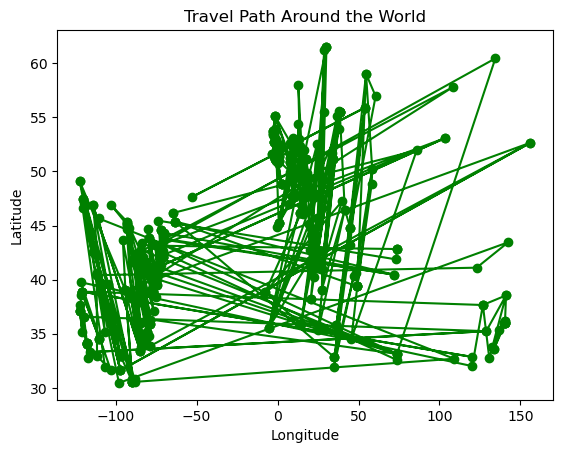

In [32]:
import matplotlib.pyplot as plt

# Assuming `travel_path` is a list of tuples containing (latitude, longitude) for each city in the order of travel
coordinates = zip(coordinates_lat,coordinates_lng)

plt.plot(coordinates_lng, coordinates_lat, marker='o', linestyle='-', color='green')
plt.title('Travel Path Around the World')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


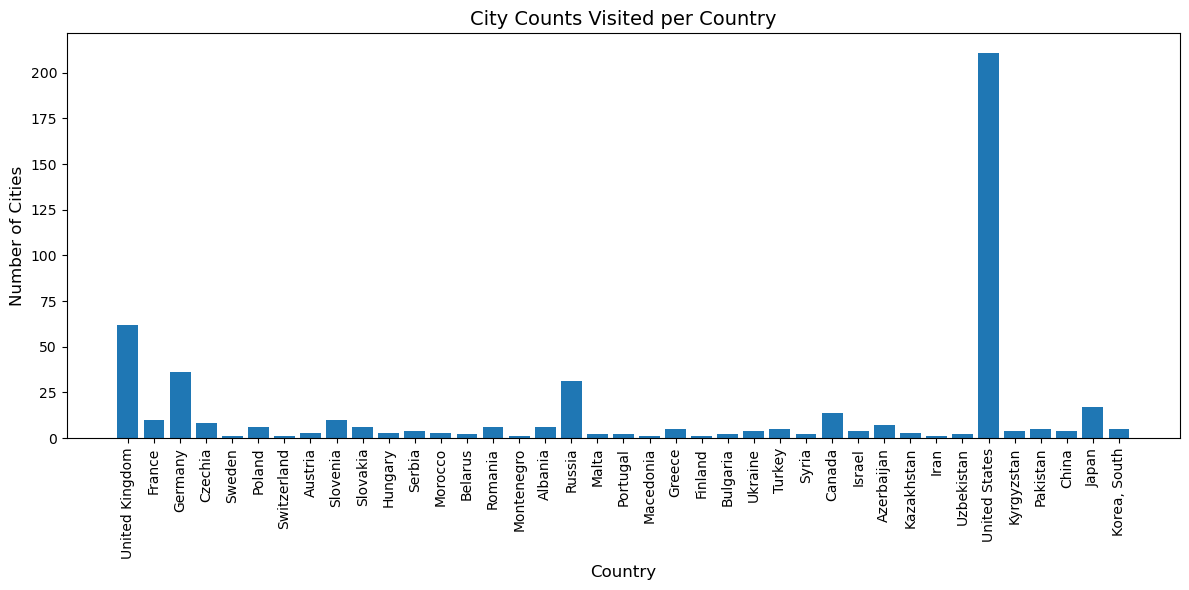

In [33]:
#how many city in each country has been visited
# Split city_and_country to extract countries
# Count occurrences of each country
country_counts = {}

# Count occurrences of each country
for entry in city_and_country:
    country = entry.split('_')[0]
    country_counts[country] = country_counts.get(country, 0) + 1
    
# Create a bar plot with adjusted size and labels
plt.figure(figsize=(12, 6))  # Adjust the figure size (width, height)

# Create a bar plot
plt.bar(country_counts.keys(), country_counts.values())
plt.xlabel('Country', fontsize=12)  # Adjust the font size
plt.ylabel('Number of Cities', fontsize=12)
plt.title('City Counts Visited per Country', fontsize=14)

# Rotate x-axis labels vertically
plt.xticks(rotation=90, ha='center')  # Rotate labels 90 degrees and center them

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

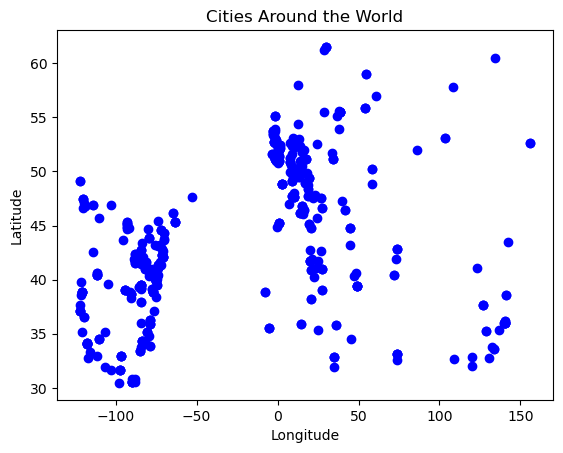

In [34]:
latitudes, longitudes = zip(*coordinates)

plt.scatter(longitudes, latitudes, marker='o', color='blue')
plt.title('Cities Around the World')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [321]:
Overall Travel Time Visualization:
Create a pie chart or a bar chart to show the distribution of the overall travel time.
python
Copy code
# Assuming `overall_travel_time` is the total time it takes to travel around the world
labels = ['First City', 'Second City', 'Third City', 'Rest of the Cities']
times = [2, 4, 8, overall_travel_time - sum([2, 4, 8])]

plt.pie(times, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightgray'])
plt.title('Overall Travel Time Distribution')
plt.show()

SyntaxError: invalid syntax (2353283378.py, line 1)

In [322]:
city_ids = sampled_df.city_id.to_list()
info_cities = {}

for each_city_id in city_ids:
    break

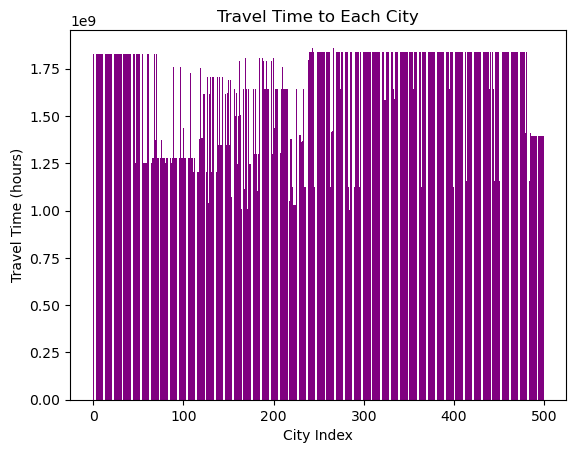

In [323]:
# Assuming `travel_times` is a list containing the travel times to each city
plt.bar(range(len(info_cities_filtered)), info_cities_filtered, color='purple')
plt.title('Travel Time to Each City')
plt.xlabel('City Index')
plt.ylabel('Travel Time (hours)')
plt.show()

In [324]:
info_cities_filtered = {}

for city_id, city_info in info_cities.items():
    # Check if 'city_names' and 'city_distances' exist for the current city
    if 'city_total_cost' in city_info:
        # Create a new dictionary with only 'city_names' and 'city_distances'
        filtered_city_info = {
            'city_total_cost': city_info['city_total_cost'],
        }
        
        # Add the filtered information to the new dictionary
        info_cities_filtered[city_id] = filtered_city_info



In [114]:
lat = sampled_df[sampled_df['city_id']==each_city_id].lat.values[0]
lng = sampled_df[sampled_df['city_id']==each_city_id].lng.values[0]    
name = sampled_df[sampled_df['city_id']==each_city_id].city_name.values[0]
country_name = sampled_df[sampled_df['city_id']==each_city_id].country.values[0]

In [115]:
sampled_df['distance_km'] = sampled_df.apply(lambda row: haversine_distance_in_km(lat,lng, row['lat'], row['lng']), axis=1)
df_sorted = sampled_df.sort_values(by='distance_km').reset_index().drop('index',axis=1)
nearest_three = df_sorted[1:4]
cost_df = calculate_cost(country_name,each_city_id,nearest_three)
sum_df_calculated = cost_df.assign(total_cost=cost_df.apply(sum_total_cost, axis=1))
sum_df_calculated

,city_name,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,city_id,distance_km,cost_country,cost_pop,travel_cost,total_cost
0,Kensington,Kensington,51.5000,-0.1900,United Kingdom,GB,GBR,Kensington and Chelsea,NaN,64681.0,1826583042,4.399398,0,0,2,2
1,Wanstead,Wanstead,51.5778,0.0286,United Kingdom,GB,GBR,Redbridge,NaN,11543.0,1826002020,13.347853,0,0,4,4
2,East Barnet,East Barnet,51.6430,-0.1630,United Kingdom,GB,GBR,Barnet,NaN,16137.0,1826125584,15.298259,0,0,8,8


In [124]:
lat = sampled_df[sampled_df['city_id']==each_city_id].lat.values[0]
lng = sampled_df[sampled_df['city_id']==each_city_id].lng.values[0]    
name = sampled_df[sampled_df['city_id']==each_city_id].city_name.values[0]
country_name = sampled_df[sampled_df['city_id']==each_city_id].country.values[0]

sampled_df['distance_km'] = sampled_df.apply(lambda row: haversine_distance_in_km(lat,lng, row['lat'], row['lng']), axis=1)
df_sorted = sampled_df.sort_values(by='distance_km').reset_index().drop('index',axis=1)
nearest_three = df_sorted[1:4]
cost_df = calculate_cost(country_name,each_city_id,nearest_three)
sum_df_calculated = cost_df.assign(total_cost=cost_df.apply(sum_total_cost, axis=1))
city_info = {
    'city_names': nearest_three['city_name'].to_list(),
    'city_ids': nearest_three['city_id'].to_list(),
    'city_distances': nearest_three['distance_km'].to_list(),
    'city_latitudes':  nearest_three['lat'].to_list(),
    'city_longitudes':  nearest_three['lng'].to_list(),
    'city_pops': nearest_three['population'].to_list(),
    'city_countries': nearest_three['country'].to_list(),
    'city_total_cost' : sum_df_calculated['total_cost'].to_list()
}
info_cities[each_city_id] = city_info

In [125]:
info_cities

{1826645935: {'city_names': ['Kensington', 'Wanstead', 'East Barnet'],
  'city_ids': [1826583042, 1826002020, 1826125584],
  'city_distances': [4.399397763981987,
   13.347852752671828,
   15.298259010581251],
  'city_latitudes': [51.5, 51.5778, 51.643],
  'city_longitudes': [-0.19, 0.0286, -0.163],
  'city_pops': [64681.0, 11543.0, 16137.0],
  'city_countries': ['United Kingdom', 'United Kingdom', 'United Kingdom'],
  'city_total_cost': [2, 4, 8]}}

In [126]:
total_cost = 0
coordinates_lat = []
coordinates_lng = []
city_and_country = []

for each_city in info_cities.keys():
    eastest_city_index = info_cities[each_city]['city_longitudes'].index(max(info_cities[each_city]['city_longitudes']))
    eastest_city_id = info_cities[each_city]['city_ids'][eastest_city_index]
    eastest_city_cost = info_cities[each_city]['city_total_cost'][eastest_city_index]
    eastest_city_lat = info_cities[each_city]['city_latitudes'][eastest_city_index]
    eastest_city_lng = info_cities[each_city]['city_longitudes'][eastest_city_index]
    eastest_city_country = info_cities[each_city]['city_countries'][eastest_city_index]
    eastest_city_name= info_cities[each_city]['city_names'][eastest_city_index]
    total_cost += eastest_city_cost
    coordinates_lat.append(eastest_city_lat)
    coordinates_lng.append(eastest_city_lng)
    city_and_country.append(eastest_city_country+'_'+eastest_city_name)
    
coordinates = zip(coordinates_lat,coordinates_lng)
    

In [127]:
coordinates

In [128]:

import folium



# Create a map centered at a specific location
m = folium.Map(location=[0, 0], zoom_start=2)

# Add markers for each coordinate
for coord in coordinates:
    folium.Marker(coord).add_to(m)

# Save the map to an HTML file or display it in a Jupyter Notebook
m.save("map.html")

In [129]:
total_cost/24


0.16666666666666666